In [18]:
# Import basic libraries 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline

#import classification modules
from sklearn.neural_network import MLPClassifier
# Selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Load Dataset
missing=["na","--",".",".."]
mydata= pd.read_csv("hepatitis.csv", na_values=missing)
mydata

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [21]:
mydata.isnull().sum() # Checking for Value

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [22]:
y=mydata["class"].copy()
X=mydata.drop(columns=["class"])
print(y.shape)
print(X.shape)

(142,)
(142, 19)


In [23]:
trainX, testX, trainy, testy= train_test_split(X,y, test_size=0.2, random_state=1)
# print("\n shape of train split: ")
print(trainX.shape)
# print("\n shape of train split: ")
print(testX.shape)

(113, 19)
(29, 19)


In [24]:
nn=MLPClassifier(hidden_layer_sizes=20,batch_size=10,max_iter=100, random_state=1)
nn.fit(trainX,trainy)
predictions = nn.predict(testX)
accnn=accuracy_score(testy, predictions)*100
print("Accuracy of Neural Networks (%): \n",accnn)  
recallnn=recall_score(testy,predictions)*100
print("Recall of Neural Networks is: \n",recallnn)
precnn=precision_score(testy,predictions)*100
print("Precision of Neural Networks is: \n",precnn)

Accuracy of Neural Networks (%): 
 68.96551724137932
Recall of Neural Networks is: 
 40.0
Precision of Neural Networks is: 
 25.0


In [25]:
nn=MLPClassifier(hidden_layer_sizes=20,batch_size=10,max_iter=100, random_state=1)

In [26]:
scores = cross_val_score(nn, X, y, cv=5, scoring='accuracy')

In [27]:
print(scores)

[0.82758621 0.93103448 0.92857143 0.82142857 0.85714286]


In [28]:
print(scores.mean())

0.8731527093596059


In [29]:
k_range = range(1,100)
k_scores = []

for k in k_range:
    nn=MLPClassifier(hidden_layer_sizes=20,batch_size=10,max_iter=k, random_state=1)
    scores = cross_val_score(nn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

In [30]:
k_scores

[0.8169950738916254,
 0.8169950738916254,
 0.8169950738916254,
 0.6199507389162562,
 0.8172413793103448,
 0.7179802955665024,
 0.8032019704433498,
 0.7963054187192118,
 0.8174876847290641,
 0.7536945812807881,
 0.7886699507389163,
 0.831527093596059,
 0.7669950738916256,
 0.7960591133004925,
 0.831527093596059,
 0.8098522167487685,
 0.8029556650246306,
 0.7807881773399015,
 0.8243842364532019,
 0.7812807881773398,
 0.8386699507389164,
 0.838423645320197,
 0.7889162561576354,
 0.8386699507389161,
 0.7455665024630542,
 0.8312807881773399,
 0.7815270935960591,
 0.8024630541871922,
 0.8527093596059114,
 0.7812807881773399,
 0.838423645320197,
 0.8243842364532019,
 0.7955665024630542,
 0.8458128078817735,
 0.7736453201970444,
 0.8096059113300493,
 0.8527093596059114,
 0.7738916256157635,
 0.8386699507389161,
 0.7596059113300493,
 0.838423645320197,
 0.7596059113300492,
 0.838423645320197,
 0.8453201970443349,
 0.8312807881773399,
 0.8305418719211822,
 0.8024630541871922,
 0.8524630541871921

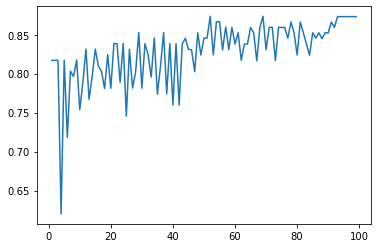

In [31]:
sns.lineplot(x = k_range, y = k_scores);